In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
from utils.predictiveNet import PredictiveNet
import matplotlib.pyplot as plt
import numpy as np
from utils.general import saveFig
import itertools
import torch
import random
from utils.agent import RandomActionAgent
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis

In [15]:
savefolder = 'Figures/S14_AliasEnv/'

In [25]:
nettypes = ['AutoencoderPred_LN','thRNN_1win','thRNN_5win','thcycRNN_5win_full']
act = ['Onehot','SpeedHD']
seeds = ['103']
netprops = itertools.product(*[nettypes,['-'],act,['-s'],seeds])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = [name[0] for name in netprops]
netact = [name[2] for name in netprops]

netfolder = '/aliasEnv/'

analysisFrame = pd.DataFrame(data={'filename':netnames, 'type':nettype, 'netfolder':netfolder, 'action':netact})

In [26]:
#netfolder = '/hyperparm_panel_masked/'
def loadNet(row):
    netfolder = row.netfolder
    try:
        net = PredictiveNet.loadNet(netfolder+row['filename'],suppressText=True)
        return net
    except:
        print(f"{row['filename']} does not exist")
        #net = PredictiveNet
        

analysisFrame['net'] = analysisFrame.apply(loadNet, axis = 1)


In [27]:
analysisFrame = analysisFrame.dropna()

In [28]:
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred_LN-Onehot-s103


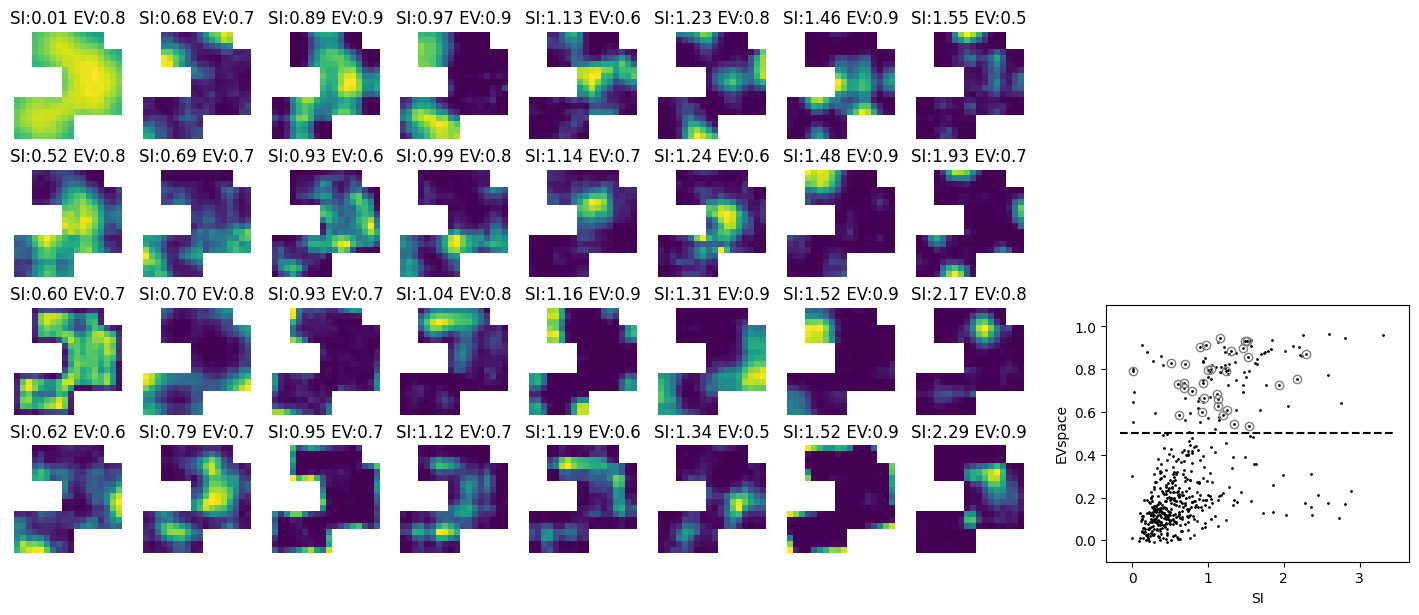

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred_LN-SpeedHD-s103


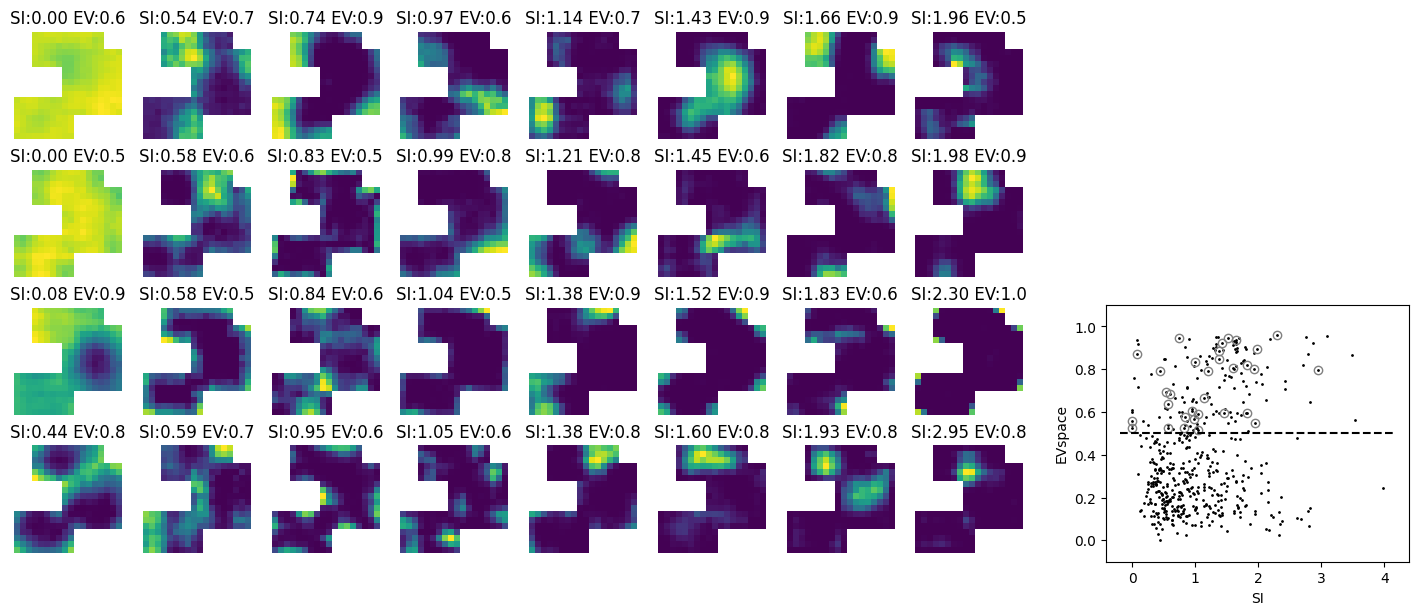

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_1win-Onehot-s103


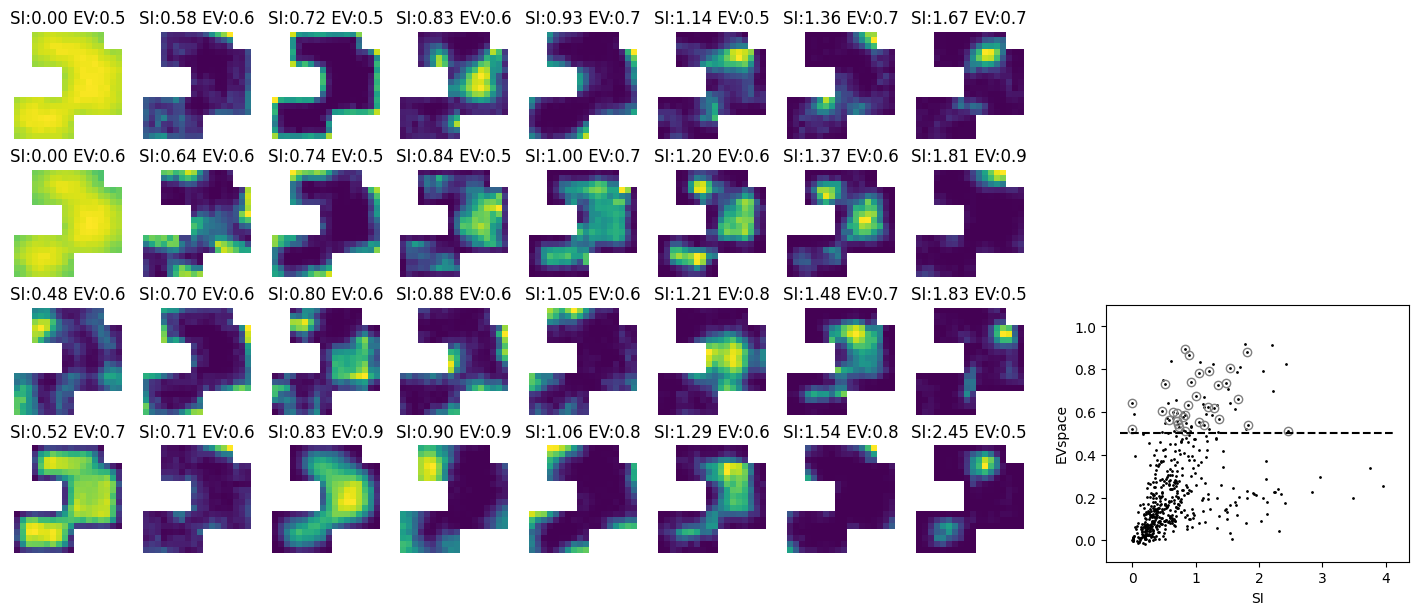

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_1win-SpeedHD-s103


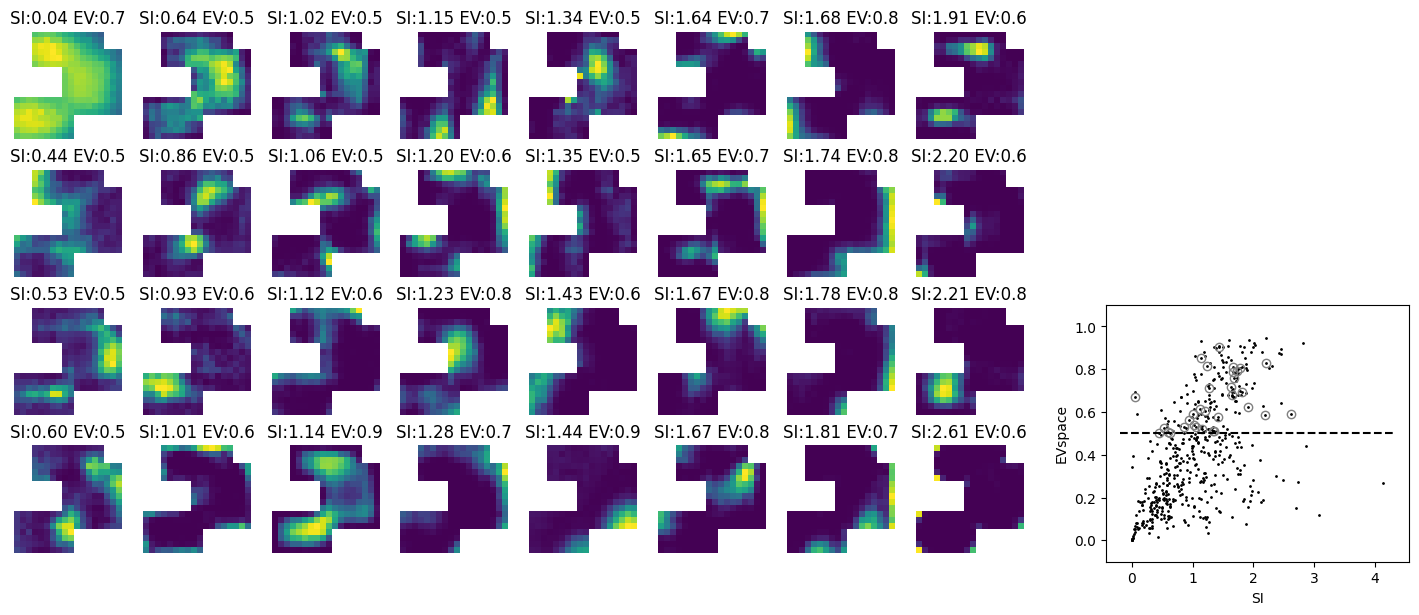

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win-Onehot-s103


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


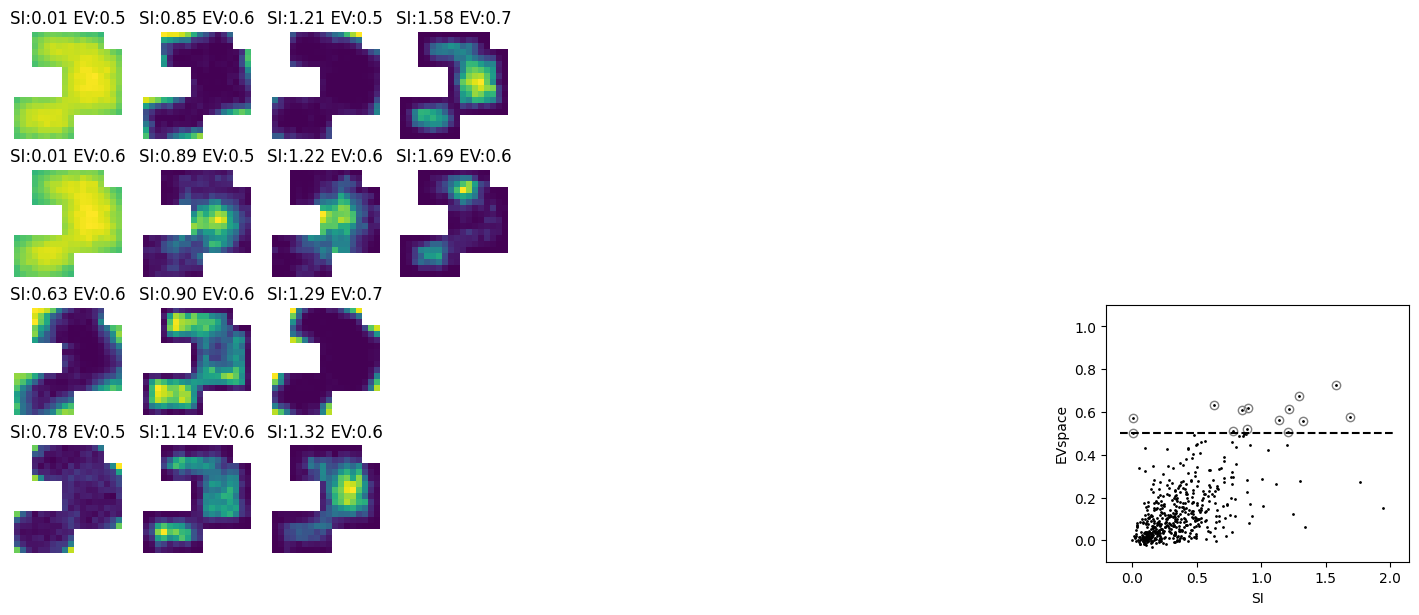

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win-SpeedHD-s103


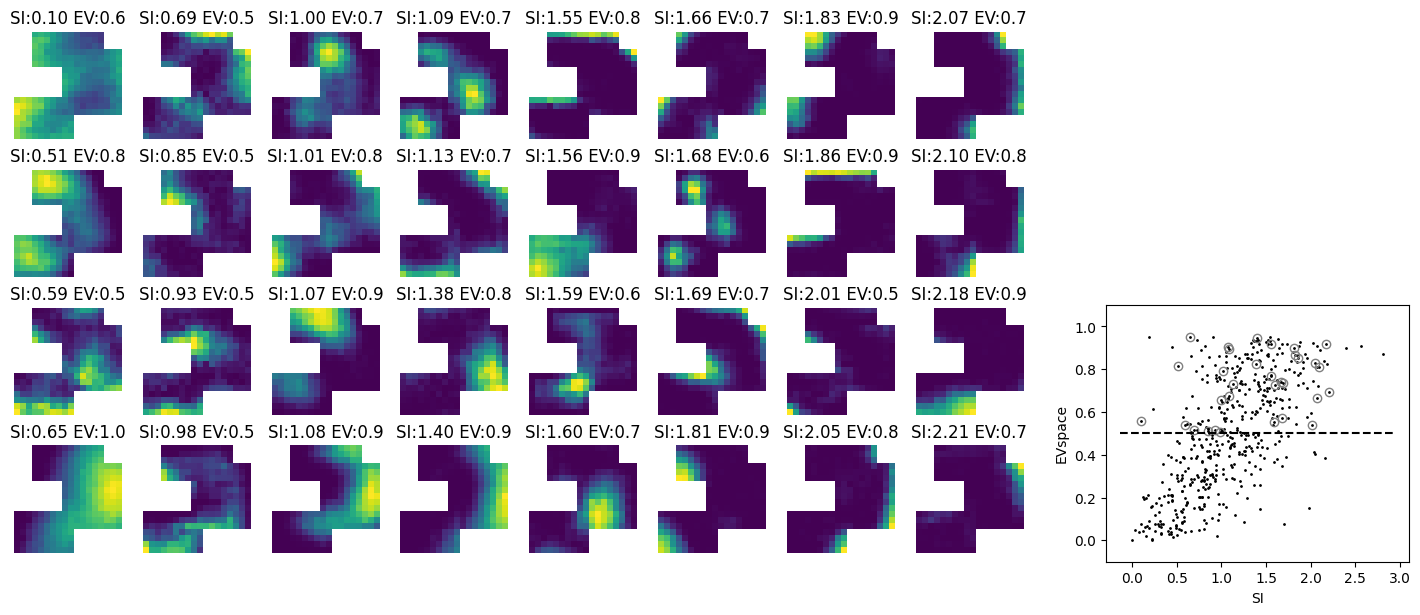

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thcycRNN_5win_full-Onehot-s103


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


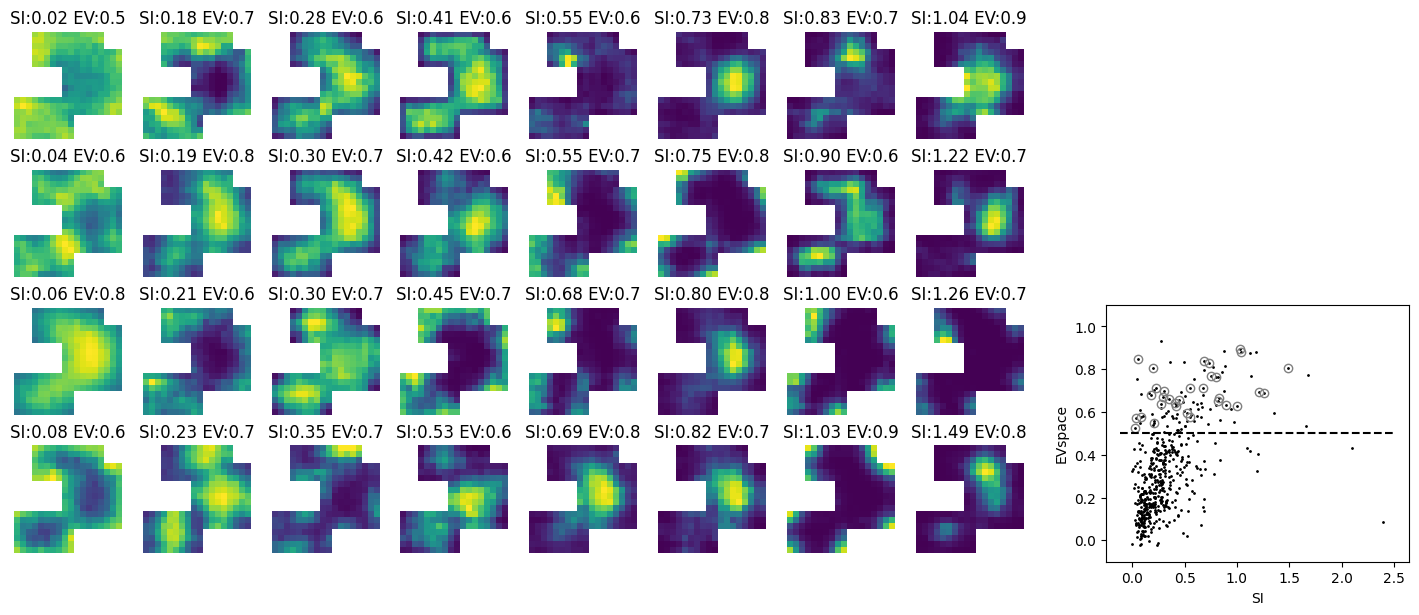

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thcycRNN_5win_full-SpeedHD-s103


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: divide by zero encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))
/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


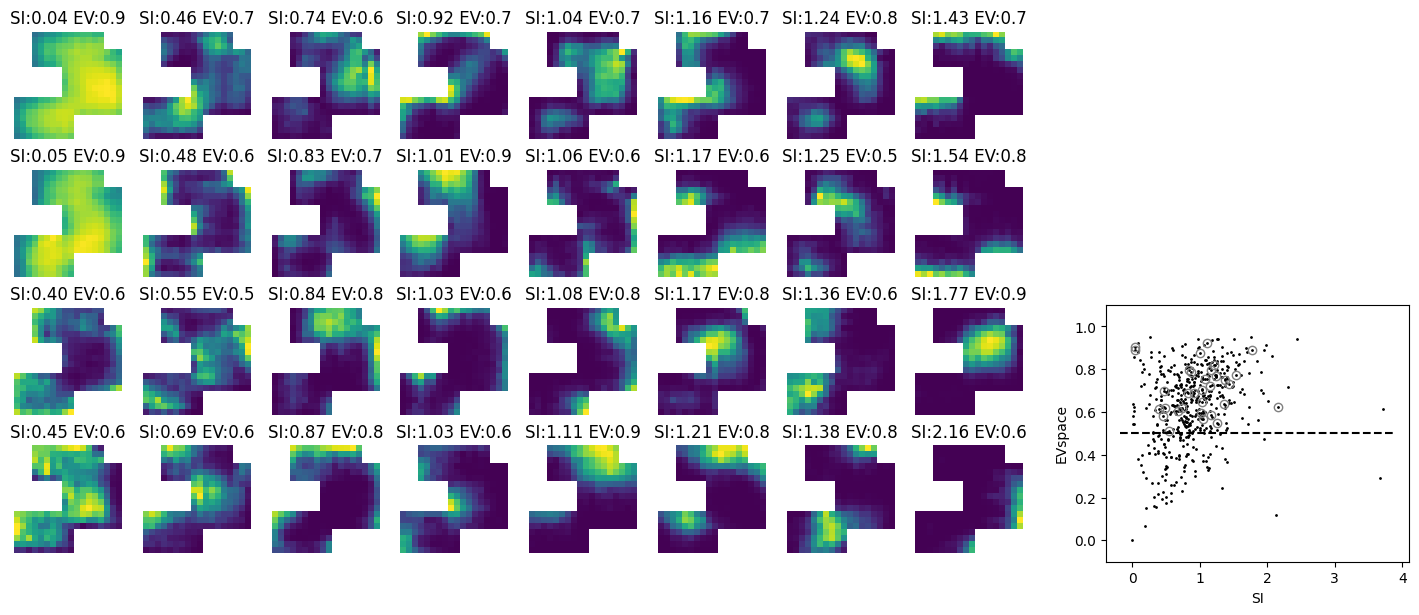

In [29]:
def TuningCurvePlot(row):
    predictiveNet = row['net']
    STA = SpatialTuningAnalysis(predictiveNet,inputControl=True, untrainedControl=False,ratenorm=True)
    netname = row['filename']

    print(netname)
    STA.TCExamplesFigure(netname,savefolder)
    plt.show()
    
    return STA
analysisFrame['STA'] = analysisFrame.apply(TuningCurvePlot, axis = 1)

In [30]:
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis

Running WAKE
Running SLEEP
Fitting Isomap
AutoencoderPred_LN-Onehot-s103


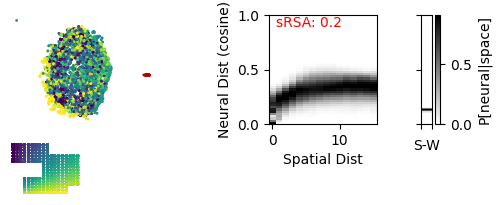

Running WAKE
Running SLEEP
Fitting Isomap


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


AutoencoderPred_LN-SpeedHD-s103


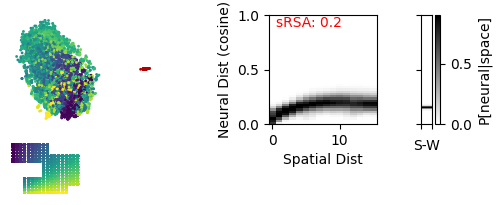

Running WAKE
Running SLEEP
Fitting Isomap
thRNN_1win-Onehot-s103


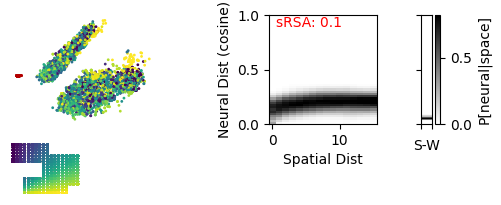

Running WAKE
Running SLEEP
Fitting Isomap
thRNN_1win-SpeedHD-s103


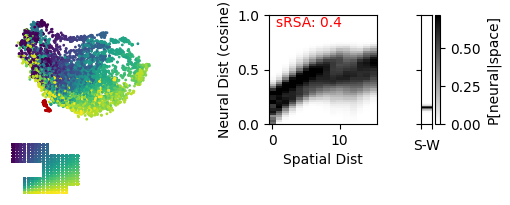

Running WAKE
Running SLEEP
Fitting Isomap
thRNN_5win-Onehot-s103


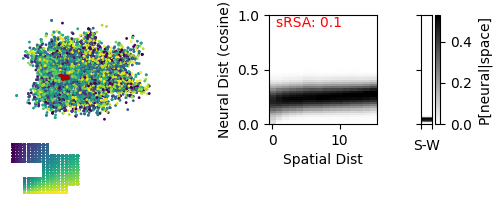

Running WAKE
Running SLEEP
Fitting Isomap
thRNN_5win-SpeedHD-s103


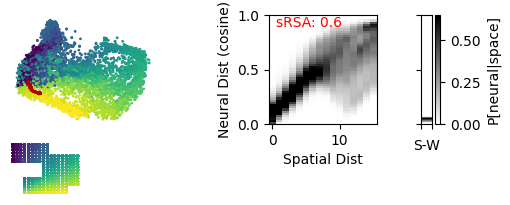

Running WAKE
Running SLEEP
Fitting Isomap
thcycRNN_5win_full-Onehot-s103


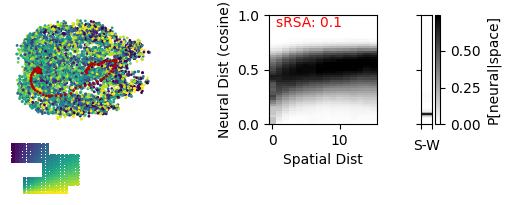

Running WAKE
Running SLEEP
Fitting Isomap
thcycRNN_5win_full-SpeedHD-s103


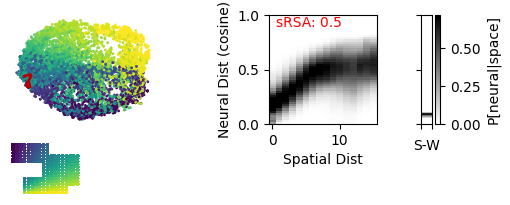

In [31]:
sleepnoise = 0.1
isomap_neighbors = 50


def RepresentationalGeometry(row):
    predictiveNet = row['net']
    netname = row['filename']
    
    RGA = representationalGeometryAnalysis(predictiveNet,noisemag = 0, noisestd=sleepnoise, 
                                       withIsomap=True, n_neighbors = isomap_neighbors,
                                          theta='expand', actRSA = False, obsRSA=False, HDRSA=False)
    print(netname)
    RGA.WakeSleepFigure(netname,savefolder,mapcenter=(0,0))
    plt.show()
    
    return RGA
analysisFrame['RGA'] = analysisFrame.apply(RepresentationalGeometry, axis = 1)

In [23]:
env = analysisFrame.iloc[0].net.EnvLibrary[0]

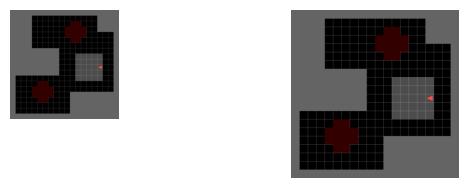

In [42]:
#env.step(2)
render = env.render(mode=None)
plt.figure()
plt.subplot(3,3,1)
plt.imshow(render)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(render)
plt.axis('off')

saveFig(plt.gcf(),'AliasEnv',savefolder,
        filetype='pdf')

plt.show()